# Modelling: Hotel Booking Prediction Cancellation

Having done data visualizations, cleaning and other priliminary analyses in the previous notebook, we will be modelling the data now.

## *Note:The models in this notebook will take a long time to run, possibly even a few hours.*

## *Please keep that in mind when running the codes*

#### Importing necessary libraries and reading the dataset that we exported in the previous notebook

In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [6]:
df = pd.read_csv("hotel_data_for_model2.csv")

In [7]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,country1
0,Resort Hotel,0,342,July,0,0,2,0.0,0,BB,...,0,C,3,No Deposit,No Agent,0,Transient,0.0,0,PRT
1,Resort Hotel,0,7,July,0,1,1,0.0,0,BB,...,0,A,0,No Deposit,No Agent,0,Transient,75.0,0,GBR
2,Resort Hotel,0,13,July,0,1,1,0.0,0,BB,...,0,A,0,No Deposit,Others,0,Transient,75.0,0,GBR
3,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,...,0,A,0,No Deposit,240.0,0,Transient,98.0,0,GBR
4,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,...,0,A,0,No Deposit,240.0,0,Transient,98.0,0,GBR


#### Columns lead time and ADR have a large range of values, which might affect the predictions
We scale these using a MinMaxScaler

In [8]:
from sklearn import preprocessing

cols_scale = ['lead_time','adr']
scaler = preprocessing.MinMaxScaler(feature_range = (0,10))
scaled_df = scaler.fit_transform(df[cols_scale])

In [9]:
scaled_df = pd.DataFrame(scaled_df, columns = cols_scale)
scaled_df.head()

,lead_time,adr
0,5.437202,0.123552
1,0.111288,1.575971
2,0.206677,1.575971
3,0.222576,2.021380
4,0.222576,2.021380


#### We want to drop these two columns from our original DF and then join it with the new scaled dataframe

In [10]:
df_nonscale = df.drop(cols_scale, axis = 1)
df_nonscale.head()

,hotel,is_canceled,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,country1
0,Resort Hotel,0,July,0,0,2,0.0,0,BB,Direct,...,0,0,C,3,No Deposit,No Agent,0,Transient,0,PRT
1,Resort Hotel,0,July,0,1,1,0.0,0,BB,Direct,...,0,0,A,0,No Deposit,No Agent,0,Transient,0,GBR
2,Resort Hotel,0,July,0,1,1,0.0,0,BB,Corporate,...,0,0,A,0,No Deposit,Others,0,Transient,0,GBR
3,Resort Hotel,0,July,0,2,2,0.0,0,BB,Online TA,...,0,0,A,0,No Deposit,240.0,0,Transient,0,GBR
4,Resort Hotel,0,July,0,2,2,0.0,0,BB,Online TA,...,0,0,A,0,No Deposit,240.0,0,Transient,0,GBR


In [11]:
df.shape

(119237, 24)

In [12]:
df_nonscale.shape

(119237, 22)

In [13]:
scaled_df.shape

(119237, 2)

#### Merging the two dataframes

In [14]:
df1=pd.merge(df_nonscale, scaled_df, left_index=True, right_index=True)

In [15]:
df1.head()

,hotel,is_canceled,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,...,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,country1,lead_time,adr
0,Resort Hotel,0,July,0,0,2,0.0,0,BB,Direct,...,C,3,No Deposit,No Agent,0,Transient,0,PRT,5.437202,0.123552
1,Resort Hotel,0,July,0,1,1,0.0,0,BB,Direct,...,A,0,No Deposit,No Agent,0,Transient,0,GBR,0.111288,1.575971
2,Resort Hotel,0,July,0,1,1,0.0,0,BB,Corporate,...,A,0,No Deposit,Others,0,Transient,0,GBR,0.206677,1.575971
3,Resort Hotel,0,July,0,2,2,0.0,0,BB,Online TA,...,A,0,No Deposit,240.0,0,Transient,0,GBR,0.222576,2.021380
4,Resort Hotel,0,July,0,2,2,0.0,0,BB,Online TA,...,A,0,No Deposit,240.0,0,Transient,0,GBR,0.222576,2.021380


In [16]:
cols = df1.columns.tolist()
print(cols)
print()
print(len(cols))

['hotel', 'is_canceled', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'country1', 'lead_time', 'adr']

24


#### To split the data into X and Y, I want to change the order of columns to make sure the target variable is the last column

In [17]:
cols_new = ['hotel', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'country1', 'lead_time', 'adr', 'is_canceled']


In [18]:
df1 = df1[cols_new]
df1.head()

,hotel,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,country1,lead_time,adr,is_canceled
0,Resort Hotel,July,0,0,2,0.0,0,BB,Direct,Direct,...,3,No Deposit,No Agent,0,Transient,0,PRT,5.437202,0.123552,0
1,Resort Hotel,July,0,1,1,0.0,0,BB,Direct,Direct,...,0,No Deposit,No Agent,0,Transient,0,GBR,0.111288,1.575971,0
2,Resort Hotel,July,0,1,1,0.0,0,BB,Corporate,Corporate,...,0,No Deposit,Others,0,Transient,0,GBR,0.206677,1.575971,0
3,Resort Hotel,July,0,2,2,0.0,0,BB,Online TA,TA/TO,...,0,No Deposit,240.0,0,Transient,0,GBR,0.222576,2.021380,0
4,Resort Hotel,July,0,2,2,0.0,0,BB,Online TA,TA/TO,...,0,No Deposit,240.0,0,Transient,0,GBR,0.222576,2.021380,0


In [19]:
df1.columns

Index(['hotel', 'arrival_date_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'country1', 'lead_time', 'adr', 'is_canceled'],
      dtype='object')

#### Booking changes is a column that might lead to data leakage, as the hotel won't know this at the time of booking
We'll drop this column

In [20]:
df1.drop('booking_changes', axis=1, inplace=True)
df1.columns

Index(['hotel', 'arrival_date_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'deposit_type', 'agent', 'days_in_waiting_list',
       'customer_type', 'required_car_parking_spaces', 'country1', 'lead_time',
       'adr', 'is_canceled'],
      dtype='object')

### Splitting data into X and y

In [21]:
X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [23]:
X.head()

,hotel,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,...,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,country1,lead_time,adr
0,Resort Hotel,July,0,0,2,0.0,0,BB,Direct,Direct,...,0,C,No Deposit,No Agent,0,Transient,0,PRT,5.437202,0.123552
1,Resort Hotel,July,0,1,1,0.0,0,BB,Direct,Direct,...,0,A,No Deposit,No Agent,0,Transient,0,GBR,0.111288,1.575971
2,Resort Hotel,July,0,1,1,0.0,0,BB,Corporate,Corporate,...,0,A,No Deposit,Others,0,Transient,0,GBR,0.206677,1.575971
3,Resort Hotel,July,0,2,2,0.0,0,BB,Online TA,TA/TO,...,0,A,No Deposit,240.0,0,Transient,0,GBR,0.222576,2.021380
4,Resort Hotel,July,0,2,2,0.0,0,BB,Online TA,TA/TO,...,0,A,No Deposit,240.0,0,Transient,0,GBR,0.222576,2.021380


#### Creating a list of categorical columns. This is to pass as argument while transforming the categorical variables

In [24]:
categorical_feature_mask = X.dtypes==object
categorical_feature_mask

hotel                              True
arrival_date_month                 True
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                               True
market_segment                     True
distribution_channel               True
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                 True
deposit_type                       True
agent                              True
days_in_waiting_list              False
customer_type                      True
required_car_parking_spaces       False
country1                           True
lead_time                         False
adr                               False
dtype: bool

In [25]:
categorical_cols = X.columns[categorical_feature_mask].tolist()
categorical_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'agent',
 'customer_type',
 'country1']

#### Transforming the categorical columns with encoding

In [27]:
labelenc = LabelEncoder()

In [28]:
X[categorical_cols] = X[categorical_cols].apply(lambda col: labelenc.fit_transform(col))
ohe = OneHotEncoder(categorical_features = categorical_feature_mask, sparse=False, handle_unknown='ignore')

In [29]:
X_ohe = ohe.fit_transform(X)

C:\Users\rahul\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [30]:
X_df = pd.DataFrame(X_ohe)
y_df = pd.DataFrame(y)

In [31]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.437202,0.123552
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111288,1.575971
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206677,1.575971
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222576,2.021380
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222576,2.021380


### Splitting the data into train and test. We can do a 75-25 split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.25, random_state = 0)

## Now that we have split the data, we can run our models

#### We will be running the following models:
1. Logistic Regression
2. k Nearest Neighbors
3. Decision Trees
4. Random Forest

## Model: Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

In [38]:
logreg = LogisticRegression()

In [39]:
logreg.fit(X_train, y_train)

C:\Users\rahul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rahul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred =logreg.predict(X_test)

In [48]:
yhat = logreg.predict_proba(X_test)
yhat

array([[0.00401377, 0.99598623],
       [0.94685146, 0.05314854],
       [0.24744672, 0.75255328],
       ...,
       [0.97157632, 0.02842368],
       [0.92064878, 0.07935122],
       [0.40599452, 0.59400548]])

In [53]:
yhat1 = yhat[:,1]

#### Plotting the ROC curve

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, yhat1)

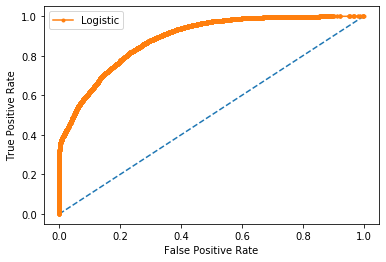

In [57]:
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [63]:
print("Logistic Regression Test Scores: ")
print()
print("Accuracy: {}".format(round(accuracy_score(y_test,y_pred)*100,2)))
print("Precision: {}".format(round(precision_score(y_test,y_pred)*100,2)))
print("Recall: {}".format(round(recall_score(y_test,y_pred)*100,2)))
print("AUC Score: {}".format(round(roc_auc_score(y_test,y_pred)*100,2)))

Logistic Regression Test Scores: 

Accuracy: 79.46
Precision: 78.52
Recall: 61.36
AUC Score: 75.74


## Model: k Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
knn = KNeighborsClassifier()

I'm running a gridsearch by setting number of neighbors as an array from 1 to 10. We can then choose the best value from this and apply on the test set

In [33]:
param_grid = {'n_neighbors': np.arange(1,10)}

In [34]:
knn_gscv = GridSearchCV(knn, param_grid, cv=3)

In [35]:
#Ignore data conversion warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [36]:
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
knn_gscv.best_params_

{'n_neighbors': 2}

In [38]:
knn_gscv.best_score_

0.8146756572399835

In [39]:
knn = knn_gscv.best_estimator_

#### Predict on test  set

In [40]:
y_pred = knn.predict(X_test)

In [41]:
print("k Nearest Neighbors Test Scores: ")
print()
print("Accuracy: {}".format(round(accuracy_score(y_test,y_pred)*100,2)))
print("Precision: {}".format(round(precision_score(y_test,y_pred)*100,2)))
print("Recall: {}".format(round(recall_score(y_test,y_pred)*100,2)))
print("AUC Score: {}".format(round(roc_auc_score(y_test,y_pred)*100,2)))

k Nearest Neighbors Test Scores: 

Accuracy: 82.04
Precision: 84.3
Recall: 63.34
AUC Score: 78.2


## Model: Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [43]:
dt_classifier = DecisionTreeClassifier()

#### For decision trees and random forests, I'm using RandomizedSearchCV.

This will select all possible combinations of random_grid, and choose 'n_iter' random combinations to fit the model.
Here, I've set n_iter as 30

In [44]:
random_grid = {'criterion': ['gini','entropy'], 'max_depth': np.arange(3,15), 'min_samples_split': [2,5,10]}
random_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'min_samples_split': [2, 5, 10]}

In [45]:
dt_random = RandomizedSearchCV(estimator = dt_classifier, param_distributions = random_grid, n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [46]:
dt_random.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

#### These is the best combination of parameters among 30 iterations

In [47]:
dt_random.best_params_

{'min_samples_split': 10, 'max_depth': 14, 'criterion': 'gini'}

In [48]:
dt_random.best_score_

0.8213514933968489

In [49]:
dt = dt_random.best_estimator_

#### Fitting the best estimator on the test set

In [50]:
y_pred = dt.predict(X_test)

In [51]:
print("Decision Tree Test Scores: ")
print()
print("Accuracy: {}".format(round(accuracy_score(y_test,y_pred)*100,2)))
print("Precision: {}".format(round(precision_score(y_test,y_pred)*100,2)))
print("Recall: {}".format(round(recall_score(y_test,y_pred)*100,2)))
print("AUC Score: {}".format(round(roc_auc_score(y_test,y_pred)*100,2)))

Decision Tree Test Scores: 

Accuracy: 82.22
Precision: 75.24
Recall: 77.54
AUC Score: 81.26


## Model: Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

#### Similar to decision trees, I'm setting a grid with a large number of possible combinations and choosing 30 random combinations to fit the train values

In [34]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 190, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [35]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 5, verbose=2,random_state = 42, n_jobs = -1)

In [36]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 48.5min finished
C:\Users\rahul\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

#### Best parameters for random forest

In [37]:
rf_random.best_params_

{'n_estimators': 90,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [38]:
rf_random.best_score_

0.8619208963735785

In [39]:
rf = rf_random.best_estimator_

#### Fitting the best estimator on the test values

In [40]:
y_pred = rf.predict(X_test)

In [43]:
print("Random Forest Test Scores: ")
print()
print("Accuracy: {}".format(round(accuracy_score(y_test,y_pred)*100,2)))
print("Precision: {}".format(round(precision_score(y_test,y_pred)*100,2)))
print("Recall: {}".format(round(recall_score(y_test,y_pred)*100,2)))
print("AUC Score: {}".format(round(roc_auc_score(y_test,y_pred)*100,2)))

Random Forest Test Scores: 

Accuracy: 86.33
Precision: 84.64
Recall: 77.1
AUC Score: 84.43


## We see that Random Forest is the best performing model among the 4 models above

Can we improve further on this model?

From a business context, we want to minimize false positives, i.e, we don't want to predict a booking as canceled when in reality, it isn't cancelled. This is detrimental to the business

Hence, we will try to change the thresholds to find a value that can give better __precision__ value

### Changing the threshold for random forest

#### I'm creating a dataframe with the following values:

1. threshold (initial default value = 0.5)
2. accuracy
3. precision
4. recall
5. auc_score


In [44]:
list1 = [0.5,round(accuracy_score(y_test,y_pred)*100,2),round(precision_score(y_test,y_pred)*100,2),
        round(recall_score(y_test,y_pred)*100,2),round(roc_auc_score(y_test,y_pred)*100,2)]

In [47]:
df_results = pd.DataFrame(data=np.array(list1).reshape(1,5), columns=['threshold','accuracy','precision','recall','auc_score'])
df_results

,threshold,accuracy,precision,recall,auc_score
0,0.5,86.33,84.64,77.1,84.43


#### Calculating scores using six different values of threshold. We will append these to the dataframe to compare the values

In [48]:
thresholds = [0.55,0.6,0.65,0.7,0.75,0.8]
for x in thresholds:
    predicted_proba = rf.predict_proba(X_test)
    predicted = (predicted_proba [:,1] >= x).astype('int')
    
    new_val = [x, round(accuracy_score(y_test,predicted)*100,2), round(precision_score(y_test,predicted)*100,2),
              round(recall_score(y_test,predicted)*100,2), round(roc_auc_score(y_test,predicted)*100,2)]
    
    df_results.loc[len(df_results)] = new_val

In [49]:
df_results

,threshold,accuracy,precision,recall,auc_score
0,0.50,86.33,84.64,77.10,84.43
1,0.55,86.06,87.98,72.26,83.22
2,0.60,85.36,91.00,67.12,81.61
3,0.65,84.18,93.34,61.70,79.55
4,0.70,82.95,95.40,56.72,77.55
5,0.75,81.79,97.10,52.42,75.75
6,0.80,80.56,98.22,48.42,73.95


#### We see that by increasing the threshold, precision increases while all other values decrease. We have to choose a value such that recall doesn't drop very low, as this would impact the hotel as well.

It is seen that if we increase threshold beyond 0.6, the precision increases slowly but the recall drops at a large rate.
Hence, 0.6 looks like an optimum value for the threshold

### Our final scores are:

1. Threshold = 0.6
2. Accuracy = 85.36%
3. Precision = 91.00%
4. Recall = 67.12%
5. AUC Score = 81.61%